# COVID-19 predictive analysis

> * Hang Gu S2124920/1

----

In [56]:
#crawl data
import time
import json
import requests

url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)

# Capture real-time json data of Tencent epidemic
data = json.loads(requests.get(url=url).json()['data'])

In [57]:
#View all keys of data data
print(data.keys())

dict_keys(['lastUpdateTime', 'chinaTotal', 'chinaAdd', 'isShowAdd', 'showAddSwitch', 'areaTree'])


In [58]:
#View the information corresponding to the key value, namely the last update time, the total number of epidemics in China, the number of new additions in China, the display of new additions, the display of the increase switch and the area tree
#Take the last update time as an example, let's check it, the rest will not be displayed
data['lastUpdateTime']

'2022-01-12 14:12:58'

In [59]:
num = data['areaTree'][0]['children']

In [60]:
# Parse the total number of confirmed cases in each province
#We define a new dictionary total_data to store the number of confirmed cases in each province
total_data = {}
for item in num:
    if item['name'] not in total_data:
        total_data.update({item['name']:0})
    for city_data in item['children']:
        total_data[item['name']] += int(city_data['total']['confirm'])    
print(total_data)

{'台湾': 17559, '陕西': 2798, '浙江': 2086, '河南': 2147, '上海': 3372, '香港': 12809, '广西': 675, '广东': 3584, '天津': 705, '福建': 1429, '云南': 1838, '四川': 1345, '湖南': 1229, '山东': 1050, '北京': 1221, '辽宁': 802, '江苏': 1629, '内蒙古': 1191, '湖北': 68320, '吉林': 590, '澳门': 79, '贵州': 160, '山西': 266, '黑龙江': 2035, '西藏': 1, '江西': 959, '重庆': 611, '宁夏': 122, '甘肃': 356, '安徽': 1009, '海南': 190, '河北': 1458, '青海': 30, '新疆': 981}


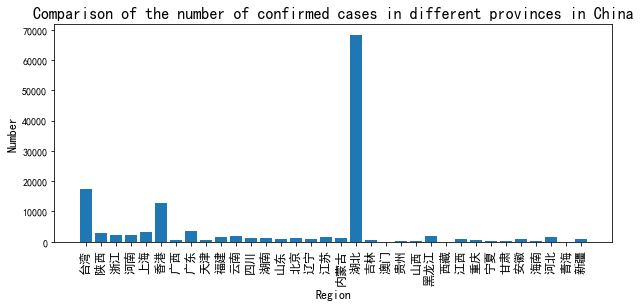

In [100]:
import matplotlib.pyplot as plt 
import numpy as np
plt.rcParams['font.sans-serif'] = ['simhei']   # Used to display Chinese labels normally

names = total_data.keys()
numbers = total_data.values()
plt.figure(figsize=[10,4])

plt.bar(names,numbers)

plt.xlabel("Region", size=12)
plt.ylabel("Number", fontproperties='SimHei', rotation=90, size=12)
plt.title("Comparison of the number of confirmed cases in different provinces in China", size=16)
plt.xticks(list(names), rotation=90, size=12)
    
plt.show()

In [62]:
#Know that Beijing is at 0, define the beijing variable
beijing=num[14]

In [63]:
# Parse the total data of confirmed diagnoses in different areas of Beijing
beijing_children_total_data = {}
for item in beijing['children']:
     if item['name'] not in beijing_children_total_data:
         beijing_children_total_data.update({item['name']:0})
         beijing_children_total_data[item['name']] += int(item['total']['confirm'])
print(beijing_children_total_data)

{'境外输入': 335, '昌平': 69, '海淀': 90, '房山': 25, '朝阳': 84, '丰台': 277, '通州': 21, '大兴': 134, '外地来京': 25, '东城': 19, '怀柔': 8, '顺义': 45, '延庆': 1, '密云': 7, '门头沟': 5, '石景山': 15, '西城': 59, '地区待确认': 2}


In [64]:
# Parse the total data of confirmed diagnoses in different areas of Beijing
bj_names = beijing_children_total_data.keys()
bj_numbers = beijing_children_total_data.values()

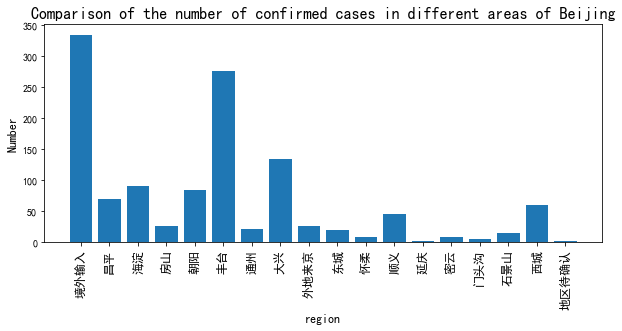

In [65]:
# Drawing
plt.figure(figsize=[10,4])

plt.bar(bj_names,bj_numbers)

plt.xlabel("region", size=12)
plt.ylabel("Number", fontproperties='SimHei', rotation=90, size=12)
plt.title("Comparison of the number of confirmed cases in different areas of Beijing", size=16)
plt.xticks(list(bj_names), rotation=90, size=12)
    
plt.show()

In [105]:
#Define the hebei variable and view its key-value pairs
hebei=num[31]
hebei.keys()

dict_keys(['name', 'today', 'total', 'children'])

In [106]:
#Check all prefecture-level cities in Hebei, you can see that Baoding is 0
hebei['children']

[{'name': '石家庄',
  'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False},
  'total': {'nowConfirm': 0,
   'confirm': 963,
   'dead': 1,
   'showRate': False,
   'heal': 962,
   'showHeal': True,
   'grade': '全部低风险',
   'wzz': 0,
   'provinceLocalConfirm': 0}},
 {'name': '地区待确认',
  'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False},
  'total': {'nowConfirm': 0,
   'confirm': 0,
   'dead': 0,
   'showRate': False,
   'heal': 0,
   'showHeal': True,
   'wzz': 0,
   'provinceLocalConfirm': 0}},
 {'name': '辛集市',
  'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False},
  'total': {'nowConfirm': 0,
   'confirm': 71,
   'dead': 0,
   'showRate': False,
   'heal': 71,
   'showHeal': True,
   'wzz': 0,
   'provinceLocalConfirm': 0}},
 {'name': '邢台',
  'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False},
  'total': {'nowConfirm': 0,
   'confirm': 96,
   'dead': 1,
   'showRate': False,
   'heal': 95,
   'showHeal': True,
   'grade': '全部低风险',
   'wzz': 0,
   'p

In [107]:
#Query the data it represents, taking Baoding as an example
hebei['children'][0]

{'name': '石家庄',
 'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False},
 'total': {'nowConfirm': 0,
  'confirm': 963,
  'dead': 1,
  'showRate': False,
  'heal': 962,
  'showHeal': True,
  'grade': '全部低风险',
  'wzz': 0,
  'provinceLocalConfirm': 0}}

In [108]:
#Check the number of confirmed cases in various prefecture-level cities in Hebei
hebei_children_total_data = {}
for item in hebei['children']:
     if item['name'] not in hebei_children_total_data:
         hebei_children_total_data.update({item['name']:0})
     hebei_children_total_data[item['name']] += int(item['total']['confirm'])
print(hebei_children_total_data)

{'石家庄': 963, '地区待确认': 0, '辛集市': 71, '邢台': 96, '保定': 51, '境外输入': 37, '廊坊': 33, '沧州': 49, '张家口': 43, '唐山': 58, '邯郸': 32, '秦皇岛': 10, '衡水': 8, '承德': 7}


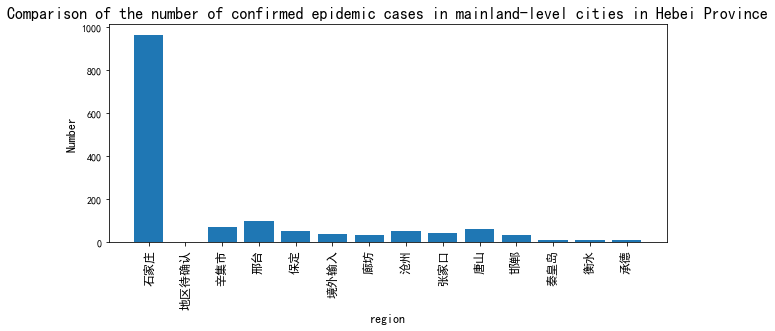

In [109]:
#Draw a comparison chart of the number of confirmed cases in various prefecture-level cities
hb_names = hebei_children_total_data.keys()
hb_numbers = hebei_children_total_data.values()
plt.figure(figsize=[10,4])

plt.bar(hb_names,hb_numbers)

plt.xlabel("region", size=12)
plt.ylabel("Number", fontproperties='SimHei', rotation=90, size=12)
plt.title("Comparison of the number of confirmed epidemic cases in mainland-level cities in Hebei Province", size=16)
plt.xticks(list(hb_names), rotation=90, size=12)
    
plt.show()

In [144]:
# Parse the diagnosis data
total_data = {}
for item in num:
    if item['name'] not in total_data:
        total_data.update({item['name']:0})
    for city_data in item['children']:
        total_data[item['name']] +=int(city_data['total']['confirm'])    
print(total_data)


# Parse death data
total_dead_data = {}
for item in num:
    if item['name'] not in total_dead_data:
        total_dead_data.update({item['name']:0})
    for city_data in item['children']:
        total_dead_data[item['name']] +=int(city_data['total']['dead'])    
print(total_dead_data)

# Parse cure data
total_heal_data = {}
for item in num:
    if item['name'] not in total_heal_data:
        total_heal_data.update({item['name']:0})
    for city_data in item['children']:
        total_heal_data[item['name']] +=int(city_data['total']['heal'])    
print(total_heal_data)

# Parse the newly diagnosed data
total_new_data = {}
for item in num:
    if item['name'] not in total_new_data:
        total_new_data.update({item['name']:0})
    for city_data in item['children']:
        total_new_data[item['name']] +=int(city_data['today']['confirm']) # today    
print(total_new_data)

{'台湾': 17559, '陕西': 2798, '浙江': 2086, '河南': 2147, '上海': 3372, '香港': 12809, '广西': 675, '广东': 3584, '天津': 705, '福建': 1429, '云南': 1838, '四川': 1345, '湖南': 1229, '山东': 1050, '北京': 1221, '辽宁': 802, '江苏': 1629, '内蒙古': 1191, '湖北': 68320, '吉林': 590, '澳门': 79, '贵州': 160, '山西': 266, '黑龙江': 2035, '西藏': 1, '江西': 959, '重庆': 611, '宁夏': 122, '甘肃': 356, '安徽': 1009, '海南': 190, '河北': 1458, '青海': 30, '新疆': 981}
{'台湾': 850, '陕西': 3, '浙江': 1, '河南': 22, '上海': 7, '香港': 213, '广西': 2, '广东': 8, '天津': 3, '福建': 1, '云南': 2, '四川': 3, '湖南': 4, '山东': 7, '北京': 9, '辽宁': 2, '江苏': 0, '内蒙古': 1, '湖北': 4512, '吉林': 3, '澳门': 0, '贵州': 2, '山西': 0, '黑龙江': 13, '西藏': 0, '江西': 1, '重庆': 6, '宁夏': 0, '甘肃': 2, '安徽': 6, '海南': 6, '河北': 7, '青海': 0, '新疆': 3}
{'台湾': 13742, '陕西': 1285, '浙江': 1542, '河南': 1608, '上海': 3017, '香港': 12304, '广西': 437, '广东': 3386, '天津': 548, '福建': 1331, '云南': 1772, '四川': 1307, '湖南': 1199, '山东': 1021, '北京': 1199, '辽宁': 793, '江苏': 1622, '内蒙古': 1185, '湖北': 63804, '吉林': 584, '澳门': 77, '贵州': 157, '山西': 265, '黑龙江': 2022, '

dict_keys(['台湾', '陕西', '浙江', '河南', '上海', '香港', '广西', '广东', '天津', '福建', '云南', '四川', '湖南', '山东', '北京', '辽宁', '江苏', '内蒙古', '湖北', '吉林', '澳门', '贵州', '山西', '黑龙江', '西藏', '江西', '重庆', '宁夏', '甘肃', '安徽', '海南', '河北', '青海', '新疆'])
dict_values([17559, 2798, 2086, 2147, 3372, 12809, 675, 3584, 705, 1429, 1838, 1345, 1229, 1050, 1221, 802, 1629, 1191, 68320, 590, 79, 160, 266, 2035, 1, 959, 611, 122, 356, 1009, 190, 1458, 30, 981])
{'台湾': 17559, '陕西': 2798, '浙江': 2086, '河南': 2147, '上海': 3372, '香港': 12809, '广西': 675, '广东': 3584, '天津': 705, '福建': 1429, '云南': 1838, '四川': 1345, '湖南': 1229, '山东': 1050, '北京': 1221, '辽宁': 802, '江苏': 1629, '内蒙古': 1191, '湖北': 68320, '吉林': 590, '澳门': 79, '贵州': 160, '山西': 266, '黑龙江': 2035, '西藏': 1, '江西': 959, '重庆': 611, '宁夏': 122, '甘肃': 356, '安徽': 1009, '海南': 190, '河北': 1458, '青海': 30, '新疆': 981}
dict_keys(['台湾', '陕西', '浙江', '河南', '上海', '香港', '广西', '广东', '天津', '福建', '云南', '四川', '湖南', '山东', '北京', '辽宁', '江苏', '内蒙古', '湖北', '吉林', '澳门', '贵州', '山西', '黑龙江', '西藏', '江西', '重庆', '宁夏', '甘肃'

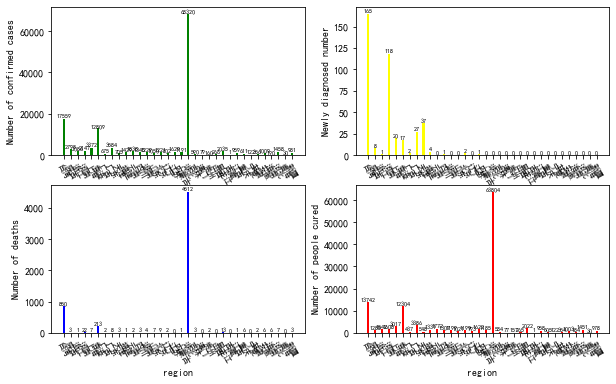

In [146]:
#------------------------------------------------------------------------------
#Step 2: Draw a histogram
#------------------------------------------------------------------------------
import matplotlib.pyplot as plt 
import numpy as np

plt.figure(figsize=[10,6])
plt.rcParams['font.sans-serif'] = ['SimHei'] #Used to display Chinese labels normally
plt.rcParams['axes.unicode_minus'] = False #Used to display the negative sign normally

#-----------------------------1.Plot diagnosis data-----------------------------------
p1 = plt.subplot(221)

# retrieve data
names = total_data.keys()
nums = total_data.values()
print(names)
print(nums)
print(total_data)
plt.bar(names, nums, width=0.3, color='green')

# set title
plt.ylabel("Number of confirmed cases", rotation=90)
plt.xticks(list(names), rotation=-60, size=8)
# 显示数字
for a, b in zip(list(names), list(nums)):
    plt.text(a, b, b, ha='center', va='bottom', size=6)
plt.sca(p1)

#-----------------------------2.Plot newly diagnosed data-----------------------------------
p2 = plt.subplot(222)
names = total_new_data.keys()
nums = total_new_data.values()
print(names)
print(nums)
plt.bar(names, nums, width=0.3, color='yellow')
plt.ylabel("Newly diagnosed number", rotation=90)
plt.xticks(list(names), rotation=-60, size=8)
# 显示数字
for a, b in zip(list(names), list(nums)):
    plt.text(a, b, b, ha='center', va='bottom', size=6)
plt.sca(p2)

#-----------------------------3.Plot death data-----------------------------------
p3 = plt.subplot(223)
names = total_dead_data.keys()
nums = total_dead_data.values()
print(names)
print(nums)
plt.bar(names, nums, width=0.3, color='blue')
plt.xlabel("region")
plt.ylabel("Number of deaths", rotation=90)
plt.xticks(list(names), rotation=-60, size=8)
for a, b in zip(list(names), list(nums)):
    plt.text(a, b, b, ha='center', va='bottom', size=6)
plt.sca(p3)

#-----------------------------4.Plot healing data-----------------------------------
p4 = plt.subplot(224)
names = total_heal_data.keys()
nums = total_heal_data.values()
print(names)
print(nums)
plt.bar(names, nums, width=0.3, color='red')
plt.xlabel("region")
plt.ylabel("Number of people cured", rotation=90)
plt.xticks(list(names), rotation=-60, size=8)
for a, b in zip(list(names), list(nums)):
    plt.text(a, b, b, ha='center', va='bottom', size=6)
plt.sca(p4)
plt.show()

In [147]:
#------------------------------------------------------------------------------
# Step 3:Save data to CSV file
#------------------------------------------------------------------------------
names = list(total_data.keys()) # province names
num1 = list(total_data.values()) # Diagnosis data
num2 = list(total_suspect_data.values()) # Suspected data (all 0)
num3 = list(total_dead_data.values()) # death data
num4 = list(total_heal_data.values()) # heal data
num5 = list(total_new_data.values()) # New confirmed cases
print(names)
print(num1)
print(num2)
print(num3)
print(num4)
print(num5)

# Get the name of the current date (2022-01-12-gz.csv)
n = time.strftime("%Y-%m-%d") + "-gz-4db.csv"
fw = open(n, 'w', encoding='utf-8')
fw.write('province,type,data\n')
i = 0
while i<len(names):
    fw.write(names[i]+',confirm,'+str(num1[i])+'\n')
    fw.write(names[i]+',dead,'+str(num3[i])+'\n')
    fw.write(names[i]+',heal,'+str(num4[i])+'\n')
    fw.write(names[i]+',new_confirm,'+str(num5[i])+'\n')
    i = i + 1
else:
    print("Over write file!")
    fw.close()

['台湾', '陕西', '浙江', '河南', '上海', '香港', '广西', '广东', '天津', '福建', '云南', '四川', '湖南', '山东', '北京', '辽宁', '江苏', '内蒙古', '湖北', '吉林', '澳门', '贵州', '山西', '黑龙江', '西藏', '江西', '重庆', '宁夏', '甘肃', '安徽', '海南', '河北', '青海', '新疆']
[17559, 2798, 2086, 2147, 3372, 12809, 675, 3584, 705, 1429, 1838, 1345, 1229, 1050, 1221, 802, 1629, 1191, 68320, 590, 79, 160, 266, 2035, 1, 959, 611, 122, 356, 1009, 190, 1458, 30, 981]
[0]
[850, 3, 1, 22, 7, 213, 2, 8, 3, 1, 2, 3, 4, 7, 9, 2, 0, 1, 4512, 3, 0, 2, 0, 13, 0, 1, 6, 0, 2, 6, 6, 7, 0, 3]
[13742, 1285, 1542, 1608, 3017, 12304, 437, 3386, 548, 1331, 1772, 1307, 1199, 1021, 1199, 793, 1622, 1185, 63804, 584, 77, 157, 265, 2022, 1, 958, 605, 122, 354, 1003, 184, 1451, 30, 978]
[165, 8, 1, 118, 20, 17, 2, 27, 37, 4, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Over write file!


0      台湾
1      台湾
2      台湾
3      台湾
4      陕西
       ..
131    青海
132    新疆
133    新疆
134    新疆
135    新疆
Name: province, Length: 136, dtype: object


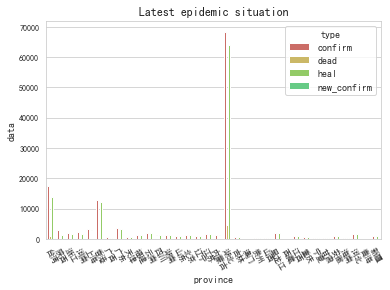

In [149]:
#------------------------------------------------------------------------------
# Step 4: Call Seaborn to draw a histogram
#------------------------------------------------------------------------------
import time
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
# read data
n = time.strftime("%Y-%m-%d") + "-gz-4db.csv"
data = pd.read_csv(n)

# setup window
fig, ax = plt.subplots(1,1)
print(data['province'])

# Set the drawing style and font
sns.set_style("whitegrid",{'font.sans-serif':['simhei','Arial']})

# draw histogram
g = sns.barplot(x="province", y="data", hue="type", data=data, ax=ax,
             palette=sns.color_palette("hls", 8))

# Set the title of the Axes
ax.set_title('Latest epidemic situation')

# Set the axis text direction
ax.set_xticklabels(ax.get_xticklabels(), rotation=-60)

# Set the font size of the axis scale
ax.tick_params(axis='x',labelsize=8)
ax.tick_params(axis='y',labelsize=8)

plt.show()

[-1.34164079 -1.28687994 -1.23211909 -1.17735824 -1.12259739 -1.06783654
 -1.0130757  -0.95831485 -0.903554   -0.84879315 -0.7940323  -0.73927145
 -0.68451061 -0.62974976 -0.57498891 -0.52022806 -0.46546721 -0.41070636
 -0.35594551 -0.30118467 -0.24642382 -0.19166297 -0.13690212 -0.08214127
 -0.02738042  0.02738042  0.08214127  0.13690212  0.19166297  0.24642382
  0.30118467  0.35594551  0.41070636  0.46546721  0.52022806  0.57498891
  0.62974976  0.68451061  0.73927145  0.7940323   0.84879315  0.903554
  0.95831485  1.0130757   1.06783654  1.12259739  1.17735824  1.23211909
  1.28687994  1.34164079]
[0.00990991 0.01420204 0.02005026 0.02788544 0.03820527 0.05156528
 0.06856141 0.08980291 0.1158749  0.14729114 0.18443876 0.22751815
 0.27648285 0.33098525 0.3903349  0.45347612 0.51899092 0.58513138
 0.64988322 0.71105885 0.76641512 0.81378725 0.85122818 0.87714098
 0.8903917  0.8903917  0.87714098 0.85122818 0.81378725 0.76641512
 0.71105885 0.64988322 0.58513138 0.51899092 0.45347612 0

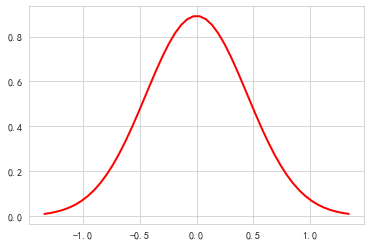

In [158]:
# -*- coding:utf-8 -*-
# Python implements normal distribution
# Plot the normal distribution probability density function
import numpy as np
import matplotlib.pyplot as plt
import math

u = 0  # mean μ
u01 = -2
sig = math.sqrt(0.2)  # standard deviation delta

x = np.linspace(u - 3 * sig, u + 3 * sig, 50)
y_sig = np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (math.sqrt(2 * math.pi) * sig)
print(x)
print("=" * 20)
print(y_sig)
plt.plot(x, y_sig, "r-", linewidth=2)
plt.grid(True)
plt.show()

